# **AUTOCORRELAÇÃO**

### **Primeiro caso: dados aleatórios normalizados**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [13]:
np.random.seed(6)
dados1 = np.random.normal(0,1,72)
dados1

array([-0.31178367,  0.72900392,  0.21782079, -0.8990918 , -2.48678065,
        0.91325152,  1.12706373, -1.51409323,  1.63929108, -0.4298936 ,
        2.63128056,  0.60182225, -0.33588161,  1.23773784,  0.11112817,
        0.12915125,  0.07612761, -0.15512816,  0.63422534,  0.810655  ,
        0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384,
       -1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953,
       -0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143,
       -0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059,
        1.38503523, -0.51962709, -0.78015214,  0.95560959, -0.12673638,
       -1.36861282,  1.21848065, -0.85750144, -0.56147088, -1.0335199 ,
        0.35877096,  1.07368134, -0.37550472,  0.39636757, -0.47144628,
        2.33660781,  1.50278553, -0.59545972,  0.52834106,  0.9398248 ,
        0.42628539, -0.75815703, -0.16236698,  0.72680996,  0.44408297,
       -0.85682264,  0.44692842, -1.01464799, -2.1323234 ,  0.17

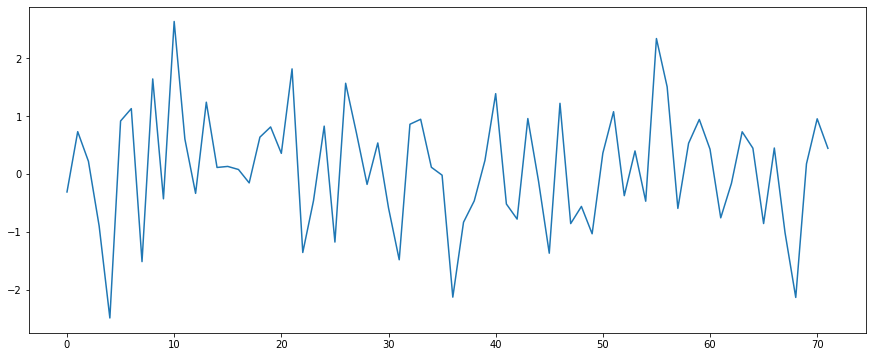

In [14]:
serie = pd.Series(dados1)
serie.plot()
plt.show()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

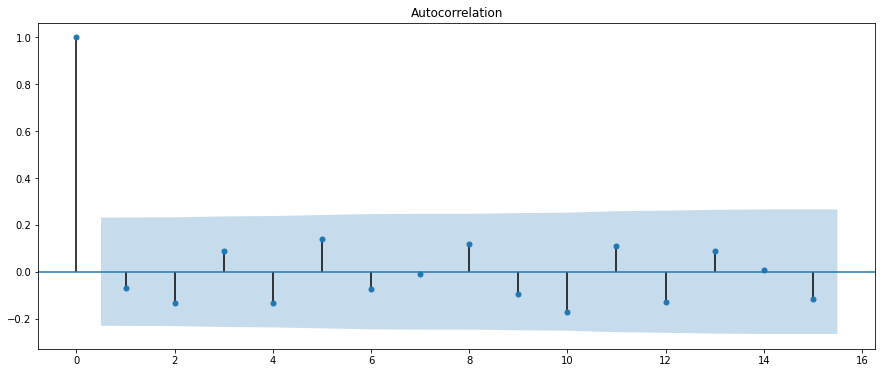

In [16]:
plot_acf(serie, lags=15)
plt.show()

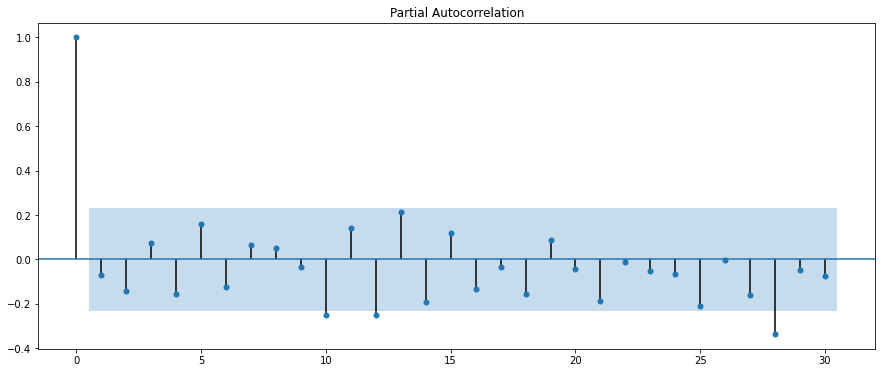

In [17]:
plot_pacf(serie, lags=30)
plt.show()

### **Segundo caso: dados externos de Manchas solares**

**Número médio mensal de manchas solares relativas de 1749 a 1983. Coletados no Observatório Federal Suíço, Zurique até 1960, e depois no Observatório Astronômico de Tóquio..**
 

In [18]:
dados2 = pd.read_csv('/content/drive/MyDrive/csv/sunspots.csv')

In [19]:
dados2

,x
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0
...,...
2816,71.8
2817,50.3
2818,55.8
2819,33.3


In [20]:
dados2.columns = ['valores']
dados2.head()

,valores
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0


In [21]:
dados2 = dados2.reset_index(drop=True) # drop é para excluir o índice anterior
dados2

,valores
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [22]:
indice = pd.date_range('1749', periods = len(dados2), freq = 'M')
indice

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='M')

In [23]:
serie2 = pd.Series(dados2['valores'].values, index = indice)

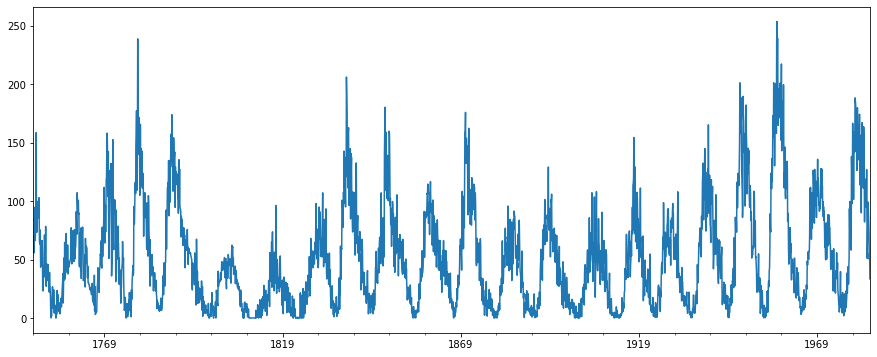

In [24]:
serie2.plot()
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

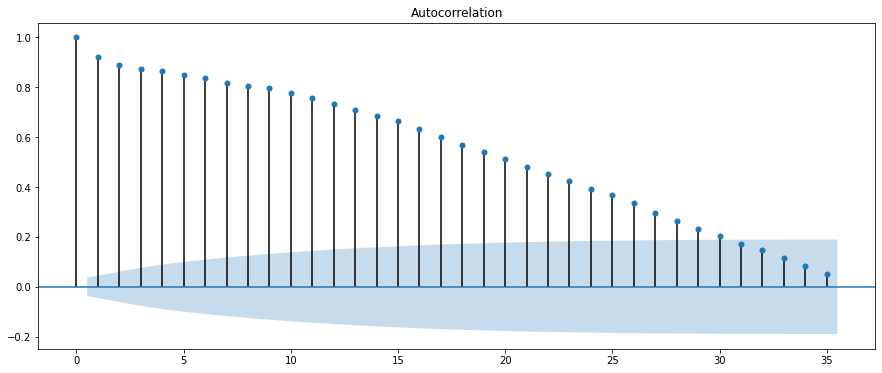

In [26]:
plot_acf(serie2)
plt.show()

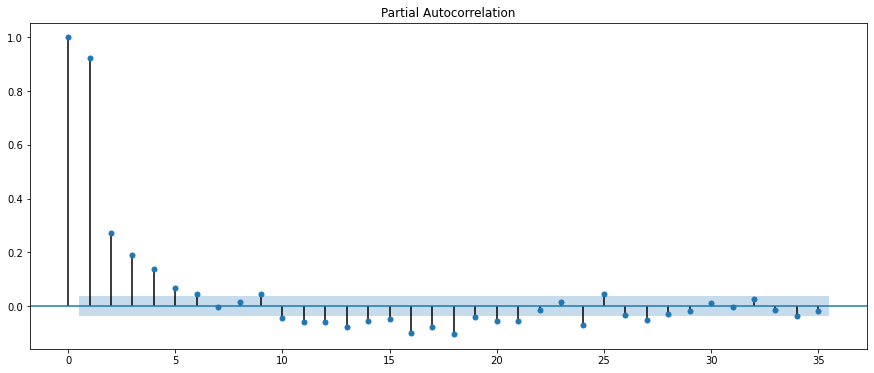

In [27]:
plot_pacf(serie2)
plt.show()

### **Terceiro caso: dados do Python sobre Manchas solares**

Dados anuais (1700-2008) sobre manchas solares.
Fonte: National Geophysical Data Center.

In [28]:
import statsmodels.api as sm

https://www.statsmodels.org/devel/datasets/index.html 

In [29]:
# Importação do Dataset Manchas Solares do Python
manchas_solares = sm.datasets.sunspots.load_pandas().data
manchas_solares

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [30]:
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = manchas_solares['YEAR'])
serie3

YEAR
1700.0     5.0
1701.0    11.0
1702.0    16.0
1703.0    23.0
1704.0    36.0
          ... 
2004.0    40.4
2005.0    29.8
2006.0    15.2
2007.0     7.5
2008.0     2.9
Length: 309, dtype: float64

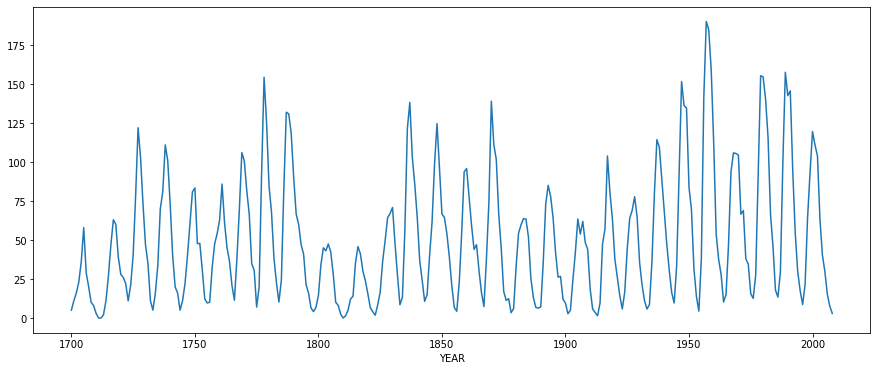

In [31]:
serie3.plot();

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

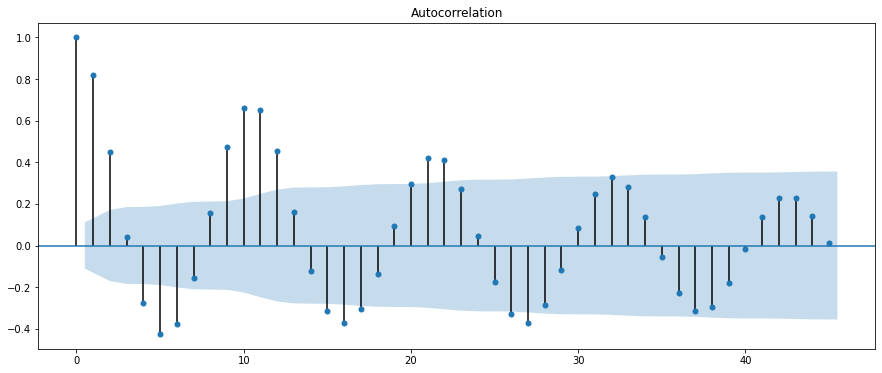

In [33]:
plot_acf(serie3, lags=45)
plt.show()

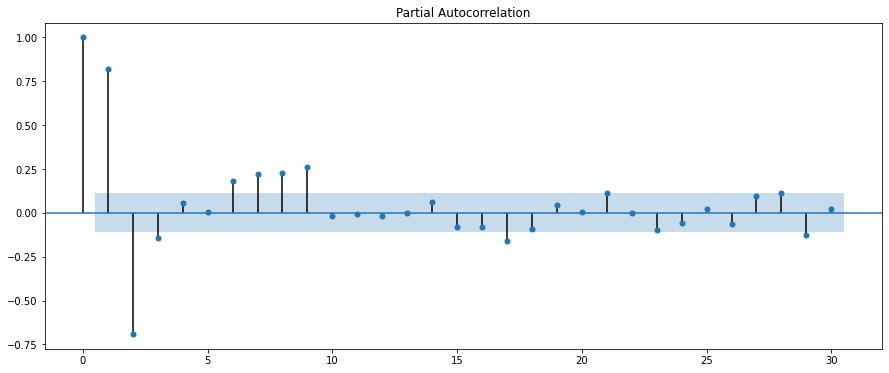

In [34]:
plot_pacf(serie3, lags=30)
plt.show()